In [ ]:
import json 
import numpy as np
import pickle

from style import *

target2title = {
    "mu": r"$\mu$",
    "alpha": r"$\alpha$",
    "homo": r"$\varepsilon_{HOMO}$",
    "lumo": r"$\varepsilon_{LUMO}$",
    "Cv": r"$C_{\nu}$"
}

targets = ["mu", "alpha", "homo", "lumo", "Cv"]


## Plot grid search results


In [4]:
def get_results_from_files(file_path, filenames):
    results = {}
    gridsearch_results = {}
    for filename in filenames:
        with open(f'{file_path}/mll/{filename}.json') as f:
            results[filename] = json.load(f)

        gridsearch_results[filename] = pickle.load(open(f'{file_path}/hyperparam/{filename}.pkl', 'rb'))
    return results, gridsearch_results


results, gridsearch_results = get_results_from_files(
    "../../results/qm9", 
    [
        "invariant", 
        "equivariant", 
        "augment", 
        "plain"
    ]
)


In [5]:

def plot_single_curve(model, t, label, ax, scatter_size, color_idx):

    prior_precs = model[t]["prior_precs"]
    margliks = model[t]["margliks"]

    best_prior_prec_idx = np.nanargmax(margliks)
    cutoff = best_prior_prec_idx + 10
    prior_precs = prior_precs[:cutoff]

    margliks = margliks[:cutoff]
    ax.plot(prior_precs, margliks, lw=3,  c=colors[color_idx], zorder=1)
    ax.scatter([prior_precs[best_prior_prec_idx]], [margliks[best_prior_prec_idx]], c=colors[color_idx], marker="*", s=200, zorder=2)
    ax.scatter([], [], c=colors[color_idx], label=label, s=200, zorder=2)

def plot_gridsearch(gridsearch_results, targets, fontsize=20, scatter_size=20):
    
    fig, ax = plt.subplots(1, len(targets), figsize=(5*len(targets),3), dpi=600)
    invariant = gridsearch_results["invariant"]

    plain = gridsearch_results["plain"]

    augment = gridsearch_results["augment"]

    equivariant = gridsearch_results["equivariant"]
    for i, target in enumerate(targets):
        ax[i].set_xscale('log', base=10)
        ax[i].set_yticks([], minor=True)
        ax[i].set_axisbelow(True)        
    
        plot_single_curve(invariant, target, "Invariant", ax[i], scatter_size, color_idx=0)
        plot_single_curve(equivariant, target, "Equivariant", ax[i], scatter_size, color_idx=1)
        plot_single_curve(augment, target, "Augment", ax[i], scatter_size, color_idx=2)
        plot_single_curve(plain, target, "Plain", ax[i], scatter_size, color_idx=3)

        if i == 0:
            ax[i].set_ylabel("Log Marg. Lik.", fontsize=15)
        ax[i].tick_params(axis='y', labelsize=12)
        ax[i].grid(which='major')

        ax[i].set_title(f"{target2title[target]}", pad=10)

    fig.supxlabel("Prior prec.", y=-0.15)    
    
    plt.legend(
        loc='upper center', 
        bbox_to_anchor=(-0.3, -0.1),
        fancybox=True, 
        shadow=True, 
        ncol=5
    )

    plt.show()




/tmp/ipykernel_216191/2235885179.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([prior_precs[best_prior_prec_idx]], [margliks[best_prior_prec_idx]], c=colors[color_idx], marker="*", s=200, zorder=2)
/tmp/ipykernel_216191/2235885179.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter([], [], c=colors[color_idx], label=label, s=200, zorder=2)


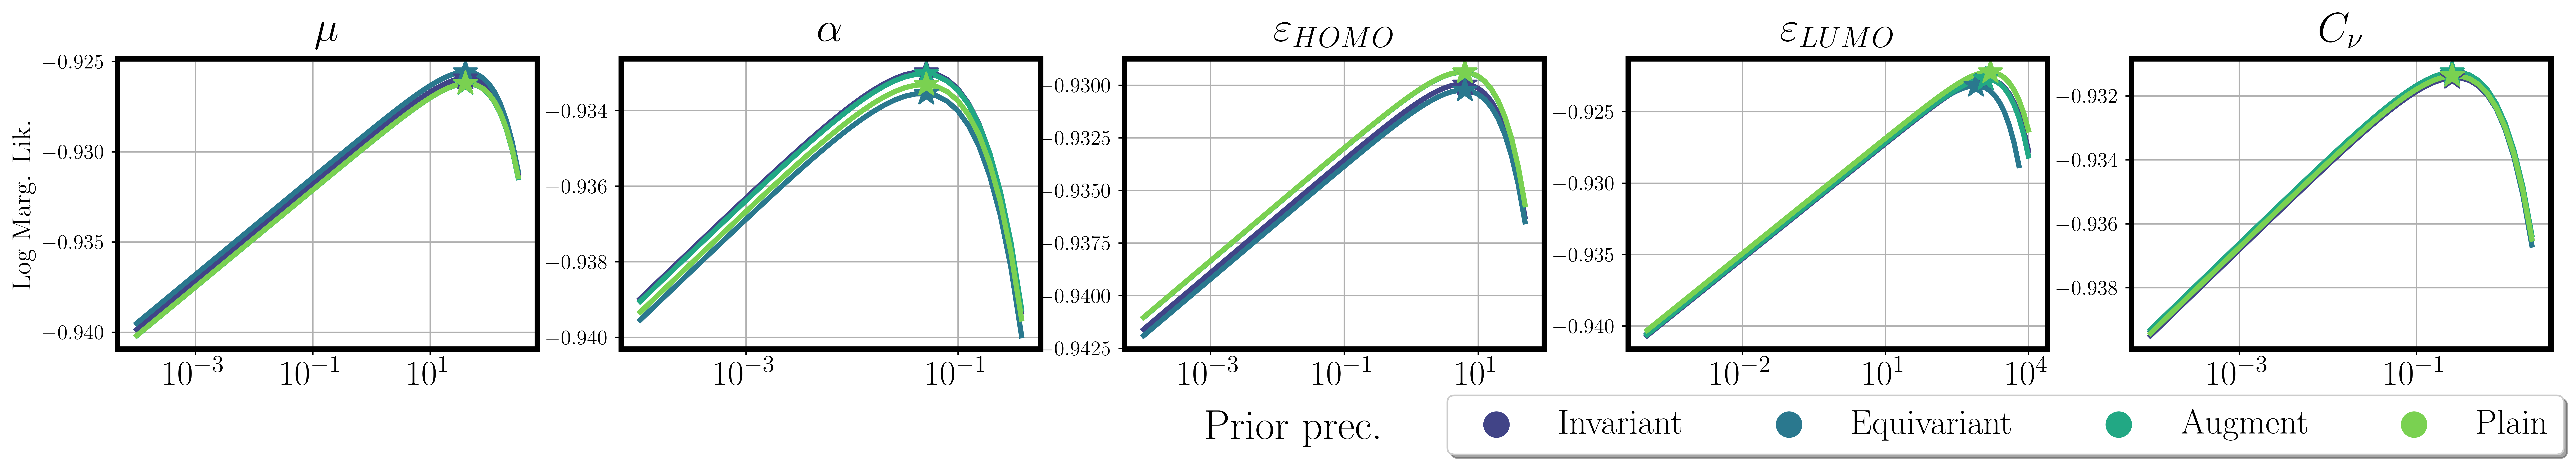

In [4]:
plot_gridsearch(
    gridsearch_results=gridsearch_results, 
    targets=targets)


## Display Laplace terms


In [6]:
import pandas as pd


rows = []

for target in targets:
    for key, data in results.items():
        target_data = data[target]

        rows.append({
            "Target": target,
            "Model": key,
            "Train MAE": target_data["mae"]["train"],
            "Train LL": target_data["post_log_likelihood"],
            "Complexity": target_data["post_complexity"],
            "Log MargLik": target_data["post_log_marglik"],
            "Test MAE": target_data["mae"]["test"],
            "Test LL": target_data["sum_LL"],
        })

df = pd.DataFrame(rows)
display(df)

,Target,Model,Train MAE,Train LL,Complexity,Log MargLik,Test MAE,Test LL
0,mu,invariant,0.002545,-101084.476562,766.586609,-101851.062500,0.020396,22064.710938
1,mu,equivariant,0.008313,-101090.921875,723.374817,-101814.296875,0.014490,22939.761719
2,mu,augment,0.004775,-101086.382812,799.180969,-101885.562500,0.025372,20825.671875
3,mu,plain,0.003826,-101086.179688,797.788696,-101883.968750,0.029562,19622.285156
4,alpha,invariant,0.010186,-101097.414062,1530.174927,-102627.585938,0.061249,768.488708
5,alpha,equivariant,0.029008,-101175.664062,1514.935547,-102690.601562,0.052211,9013.306641
6,alpha,augment,0.015305,-101112.296875,1521.020142,-102633.320312,0.067934,-3731.464844
7,alpha,plain,0.010555,-101100.492188,1563.934326,-102664.429688,0.088827,-19272.195312
8,homo,invariant,0.254086,-101083.250000,1211.353760,-102294.601562,23.484737,20586.169922
9,homo,equivariant,2.968015,-101084.046875,1242.503174,-102326.546875,21.370448,20988.617188
